# PCA matrix inverse

Review [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In this coding challenge, you will extract the components of PCA and apply them manually. Doing so will enable you to leverage the PCA libraries more effectively, without necessarily needing to learn the most core mathematics ([eigendecomposition](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix)).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


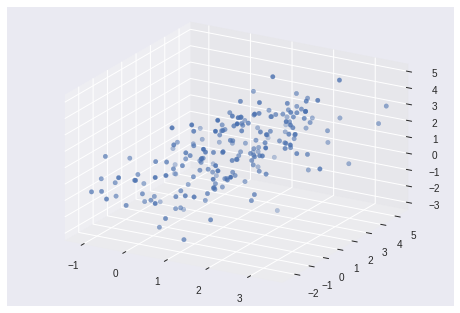

In [1]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

points1 = np.random.multivariate_normal([1,1,1],[[1,2,2],[0.1,1,1.5],[1,2,1]],200)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', proj_type='ortho')
ax.scatter(*points1.T);

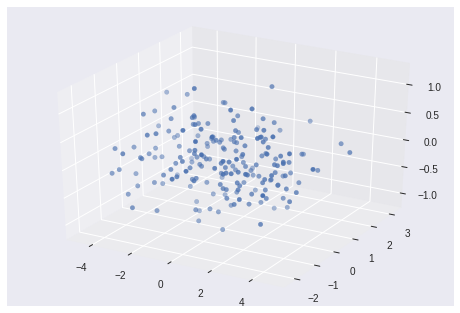

In [2]:
# Use PCA
from sklearn.decomposition import PCA

model = PCA()
model.fit(points1)
points1 = model.transform(points1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*points1.T);

# The points are now better distributed, maximizing their variance or spread.

## Back to the original

The `points1` object has been transformed by the PCA model into a new set of points.

The `model` object contains attributes that represent that transformation:

* `components_`: The new basis vectors (eigenvectors) that maximize the variance of the original data
* `explained_variance_`: The amount of variance per eigenvector (called eigenvalues).

Remember that the inverse of a matrix $M^{-1}$ is the matrix that reverses the transformation created by $M$: $MM^{-1} = I$. `components_` is the exact $M$ which the PCA library used to transform your data. Compute its inverse, then project `points1` back into the original space.

In [3]:
print(model.components_)
print(model.explained_variance_)

[[ 0.31210463  0.71863649  0.62141153]
 [ 0.48404288  0.44254066 -0.75489089]
 [ 0.81749201 -0.53639477  0.20973189]]
[4.5253698  0.83519628 0.20483075]


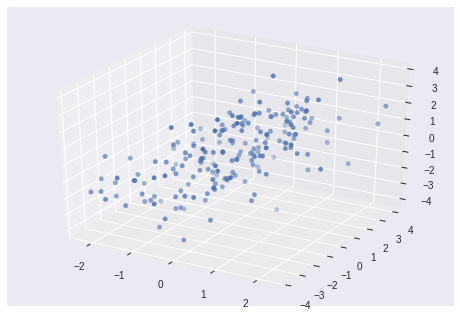

In [4]:
# Invert the components of the PCA and re-apply
inverse_components = np.linalg.inv(model.components_)
points1_T = np.matmul(inverse_components, points1.T)

# Plot again. This should perfectly match the original 3d plot.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*points1_T);

It seems that the data is of the correct scale and shape, but is centered around the origin, while the original data is centered around some other point.

In [5]:
mean = model.mean_
print(mean)

[1.12897916 1.24967952 1.10934245]


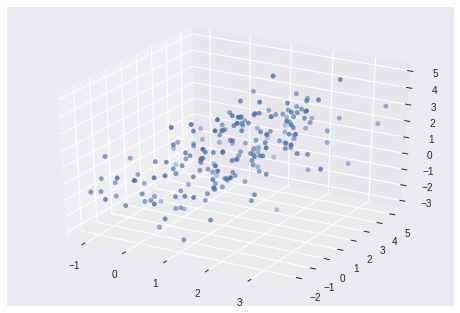

In [6]:
points1_T = points1_T + mean.reshape(3, 1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*points1_T);

## Consider `n_components`

If you built your PCA using the `n_components` argument, and `n` is less than the dimensionality of your original data, how does this affect the above?

Using `n` less than the dimensionality of the data will cause PCA to project the data onto a lower dimension. For example, a plane if `n = 2`.

In this case, the original data cannot be recovered from the transformed data, indicating that some information has been lost in dimensionality reduction.

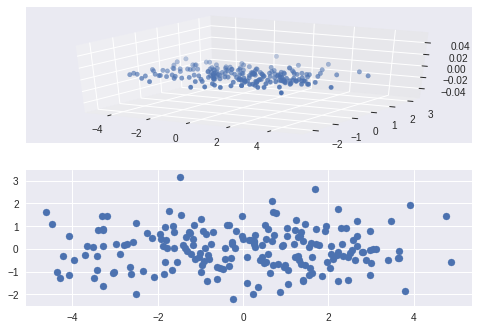

In [7]:
model = PCA(n_components=2)
model.fit(points1)
points1 = model.transform(points1)
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.scatter(*points1.T);

ax = fig.add_subplot(212)
ax.scatter(points1.T[0], points1.T[1]);